<a href="https://colab.research.google.com/github/pdivya-mca/Multiple-Linear-Regression_Petrol-Consumption-Dataset/blob/main/Multiple_Linear_Regression_Petrol_Consumption_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression_Petrol Consumption Dataset**

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading dataset(petrol_consumption.csv file)
dataset=pd.read_csv("/content/petrol_consumption.csv")

In [ ]:
#printing shape of dataset
dataset.shape

(48, 5)

In [ ]:
#fetching top 5 rows
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## **Cleaning Dataset**

In [ ]:
# By using describe function checking for min, max, percentaile and outliers
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
#checking for null values
dataset.isnull().sum()

# both columns null count is 0 so no null values in dataset

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
#ckecking for duplicate
dataset.duplicated().sum()

# count is zero so no duplicate

0

In [ ]:
#checking for datatype in right format or not
dataset.dtypes

#datatype also in the right format and and also a strctured data.

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
#finding outlier for each column
#Petrol_tax column
iqr=dataset['Petrol_tax'].quantile(0.75)-dataset['Petrol_tax'].quantile(0.25)
upper_threshold=dataset['Petrol_tax'].quantile(0.75)+(1.5*iqr)
lower_threshold=dataset['Petrol_tax'].quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(9.8125, 5.3125)

from the above output the max value is greater than upper threshold but they are very close so no need to delete the outliers

In [ ]:
#finding outlier for each column
#Average_income column
iqr=dataset['Average_income'].quantile(0.75)-dataset['Average_income'].quantile(0.25)
upper_threshold=dataset['Average_income'].quantile(0.75)+(1.5*iqr)
lower_threshold=dataset['Average_income'].quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(5838.375, 2479.375)

From the above result there is no outliers

In [ ]:
#finding outlier for each column
#Paved_Highways column
iqr=dataset['Paved_Highways'].quantile(0.75)-dataset['Paved_Highways'].quantile(0.25)
upper_threshold=dataset['Paved_Highways'].quantile(0.75)+(1.5*iqr)
lower_threshold=dataset['Paved_Highways'].quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(13224.625, -2958.375)

The max value in dataset is 17782, but in upper threshold the value is 13224. so it is too far from max value so we need to treat the outliers. so we are going to clip the dataset. 

In [ ]:
#cliping of outlier
dataset.Paved_Highways=dataset.Paved_Highways.clip(-2958.375,13224.625)
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5450.442708,0.570333,576.770833
std,0.950770,573.623768,3149.104278,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,13224.625000,0.724000,968.000000


In [ ]:
#finding outlier for each column
#Population_Driver_licence(%) column
iqr=dataset['Population_Driver_licence(%)'].quantile(0.75)-dataset['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold=dataset['Population_Driver_licence(%)'].quantile(0.75)+(1.5*iqr)
lower_threshold=dataset['Population_Driver_licence(%)'].quantile(0.25)-(1.5*iqr)
upper_threshold, lower_threshold

(0.6934999999999998, 0.4315000000000002)

from the above example there is no need to treat the outliers because it not too far from the upper and lower threashold. max value is near tot he threshold value.

In [ ]:
dataset.shape

(48, 5)

## **Exploratory Data Analysis**

**Checking each feature to target variable by using scatter plot because all fearture and target are continuous variable**


Text(0, 0.5, 'Petrol_Consumption')

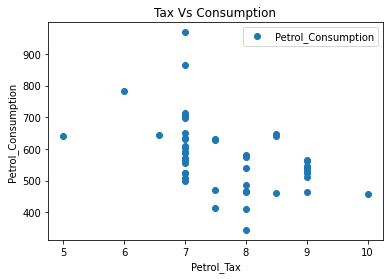

In [ ]:
#Petrol_tax column
dataset.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
plt.title("Tax Vs Consumption")
plt.xlabel('Petrol_Tax')
plt.ylabel('Petrol_Consumption')

from thea above visual, many countries can have same tax percentage so they clutered together. to make it more visualisable group all countries that has the same petrol tax percentage take the average petrol consmtion and plot the data.

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

Text(0, 0.5, 'Petrol_Consumption')

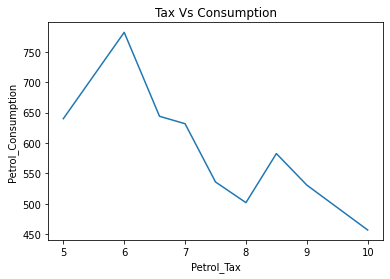

In [ ]:
#grouping petrol_tax column

dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.title("Tax Vs Consumption")
plt.xlabel('Petrol_Tax')
plt.ylabel('Petrol_Consumption')

From the above visual if tax is increasing the consumption decreases. we are not able to tell whether this is straight line or not so we are going to calculate correlation. 

In [ ]:
#finding corelation of petrol_tax and petrol_consumption column
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


the value ofpetrol consumption is -0.45 which is less than -0.2 so itis linear relationship so we can apply linear regression

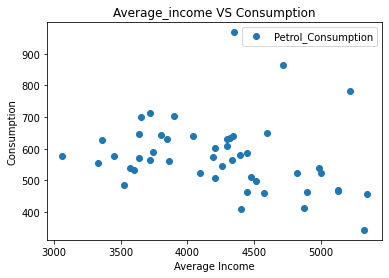

In [ ]:
# Average_income
dataset.plot(x='Average_income',y='Petrol_Consumption',style='o')
plt.title('Average_income VS Consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()

From the above chart its shows like a linear relationship only. so will find the correlation for exact value.

In [ ]:
#finding correlation of average_income vs petrol_consumption
dataset[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


It is negatively correlated the value is around( -0.2 ). If average income increases petrol consumption is decreases. low linear relationship between average income and petrol consumption.

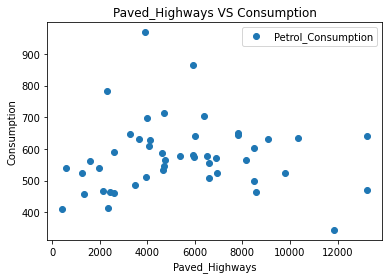

In [ ]:
#Paved_Highways
dataset.plot(x='Paved_Highways',y='Petrol_Consumption',style='o')
plt.title('Paved_Highways VS Consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()

In [ ]:
#finding correlation of paved_highways vs petrol_consumption
dataset[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009852
Petrol_Consumption,0.009852,1.000000


if the value is >0.2 it isa +ve linear relation, value < -0.2 -ve linear relation. if the values in between -0.2 to 0.2 it is not a linear relation. from the above resumelt values are o.o so there is no linear relation between paved_highways and petrol_consumption. so we will transform the data. common transformations are square, cube, log, sqrt, e power and make a visual and correlation. 

**Transformation on paved_highways**

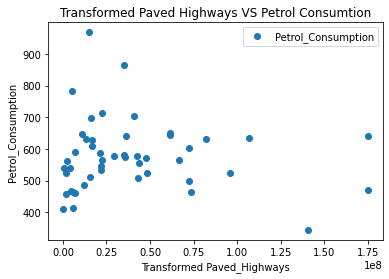

,transformed,Petrol_Consumption
transformed,1.000000,-0.090403
Petrol_Consumption,-0.090403,1.000000


In [ ]:
# Transform using square
import numpy as np
dataset['transformed']=np.square(dataset['Paved_Highways'])
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Transformed Paved Highways VS Petrol Consumtion')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

From the above result there is no correlation between square transformation

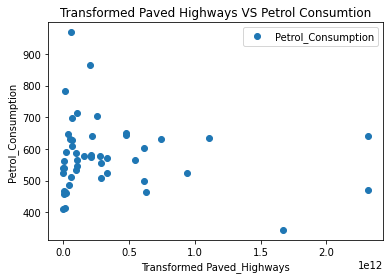

,transformed,Petrol_Consumption
transformed,1.000000,-0.134562
Petrol_Consumption,-0.134562,1.000000


In [ ]:
# Transform using cube
import numpy as np
dataset['transformed']=np.power(dataset['Paved_Highways'],3)
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Transformed Paved Highways VS Petrol Consumtion')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

From the above result there is no correlation between cube transformation

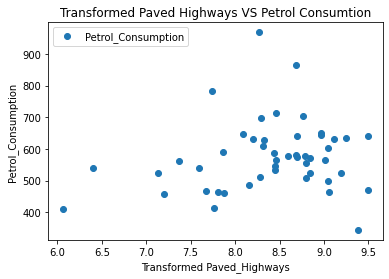

,transformed,Petrol_Consumption
transformed,1.000000,0.165334
Petrol_Consumption,0.165334,1.000000


In [ ]:
# Transform using log
import numpy as np
dataset['transformed']=np.log(dataset['Paved_Highways'])
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Transformed Paved Highways VS Petrol Consumtion')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

From the above result there is no correlation between log transformation

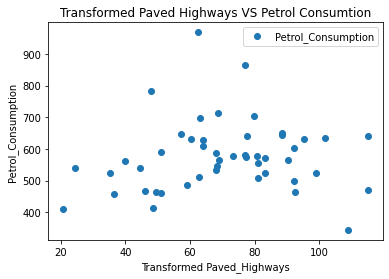

,transformed,Petrol_Consumption
transformed,1.000000,0.084753
Petrol_Consumption,0.084753,1.000000


In [ ]:
# Transform using square root
import numpy as np
dataset['transformed']=np.power(dataset['Paved_Highways'],0.5)
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Transformed Paved Highways VS Petrol Consumtion')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

From the above result there is no correlation between sqrt transformation

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


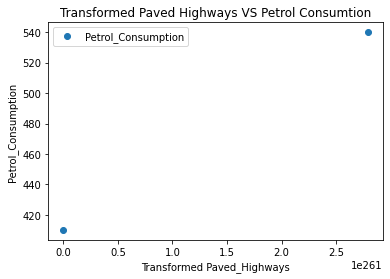

,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


In [ ]:
# Transform using  e power x
import numpy as np
dataset['transformed']=np.exp(dataset['Paved_Highways'])
dataset.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.title('Transformed Paved Highways VS Petrol Consumtion')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

From the above result there is no correlation between sqrt transformation

None of the transformations are indicating linear relationship in the data. so we will drop the feature selection from dataset. we will not consider this feature in dataset.

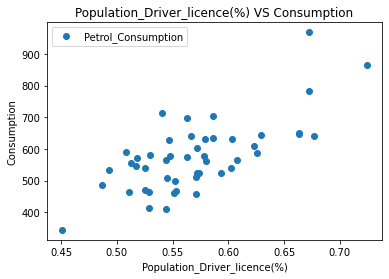

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [ ]:
#Population_Driver_licence(%)
dataset.plot(x='Population_Driver_licence(%)',y='Petrol_Consumption',style='o')
plt.title('Population_Driver_licence(%) VS Consumption')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

From the graph we can find if the population driver licence increases the petrol consumption also increases. there is a positivi linear relation. from the correlation we can fins the value >0.2 so it is positively correlated. so we can apply linear regression.

**Feature Selection :** we are not going to use paved highway in linear relation. so our final feature is petrol_tax,average_income and population driver licence. Target variable is petrol consumption.

## **Encoding**

Encoding is not required because all features are continuous variable. so no need of encoding.

## **Splitting**

In [ ]:
# All features stored in X
# Target variable stored in y

X=dataset[['Petrol_tax','Average_income','Population_Driver_licence(%)']].values
y=dataset['Petrol_Consumption']

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## **Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

## **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train) # developing model on scaled training data not on the original training data

LinearRegression()

In [ ]:
# before predictiong value check for coefficient y=mx+c (3 feature so y=m1x+m2x+m3x+c) so 4 argument
coeff_df=pd.DataFrame(regressor.coef_,['Petrol_tax','Average_income','Population_Driver_licence(%)'],columns=['coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,coefficient
Petrol_tax,-31.405371
Average_income,-34.847318
Population_Driver_licence(%),69.528183


In [ ]:
#intercept value ie c
regressor.intercept_ # c 

570.1578947368421

In [ ]:
#after fitting lenear regression algorithm Final learnt model is:
# petrol_consumption = -31.40 *scaled_petrol_tax + -34.84 * scaled_avg_income +  69.52* scaled_pop_driver + 570.15

**Find Feature Importance**

Which is the most important feature among 3 featrure to predict petrol consumption?
**Ans:** to find feature importance in linear regression, we can look at the absolute value of the coefficient. by comparing absolute value of coefficient we can predict which ismost important or least

In [ ]:
# most imporant feature is population_driver_licence, 2nd most highest is average inice, least important is petrol_tax


In [ ]:
# Predection -- when new data point comes in first we will scale the data and transform the dataa then we will predict the data
# random values -- Petrol_tax =11 , income --5000 , driving licence percentage -- 0.6
regressor.predict(scaler.transform(np.array([[11,5000,0.6]]))) 


array([449.08300084])

## **Evaluation Metric for Linear Regression -- R^2**

In [ ]:
from sklearn import metrics
print ('R2-Score :',metrics.r2_score(y_test,y_pred))

R2-Score : 0.49724619437767104


## **Conclusion:**
R2 score min =  - infinity, baseline = 0 , max = 1 we got 0.49 it is above than baseline so linear regression model is fit for this data.